In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [2]:
# loading data from numpy array file
data=np.load('data.npy')
target=np.load('target.npy')

In [3]:
### Model Architecute

# Defining sequential model
model = Sequential()

# first layer of CNN with 100 filters, activation function as RELU and Maxpooling layer
model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Seconf layer of CNN with 100 filters, activation function as RELU and Maxpooling layer
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer for converting data into single column for next layers input
model.add(Flatten())

# Dropout layer for dropping 0.5 amount of neurons
model.add(Dropout(0.5))

# Dense layer with 50 neurons and Activation function as RELU
model.add(Dense(50,activation='relu'))

# Output layer with 2 output neurons which are (with mask and without mask) and Activation Softmax
model.add(Dense(2,activation='softmax'))

In [4]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
# Checkpoint for saving the models after each epochs, and save the only best model
checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

In [7]:
# Training the model
history=model.fit(
  train_data,
  train_target,
  epochs=20,
  callbacks=[checkpoint],
  validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 56s 2s/step - loss: 0.7065 - accuracy: 0.4927 - val_loss: 0.6728 - val_accuracy: 0.7702
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 45s 1s/step - loss: 0.6225 - accuracy: 0.7030 - val_loss: 0.5498 - val_accuracy: 0.6815
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
31/31 [==============================] - 44s 1s/step - loss: 0.4689 - accuracy: 0.8092 - val_loss: 0.3720 - val_accuracy: 0.8266
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
31/31 [==============================] - 45s 1s/step - loss: 0.2982 - accuracy: 0.8944 - val_loss: 0.2694 - val_accuracy: 0.9032
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
31/31 [==============================] - 45s 1s/step - loss: 0.2004 - accuracy: 0.9296 - val_loss: 0.1937 - val_accuracy: 0.9113
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20

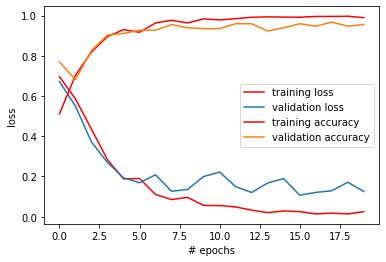

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 303ms/step - loss: 0.1732 - accuracy: 0.9565
[0.17315717041492462, 0.95652174949646]
